## Final Project Submission

Please fill out:
* Student name: MARCUS KAULA
* Student pace: self paced / part time / full time
* Scheduled project review date/time:
* Instructor name:
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

#**IMDB FILM DATA ANALYSIS**

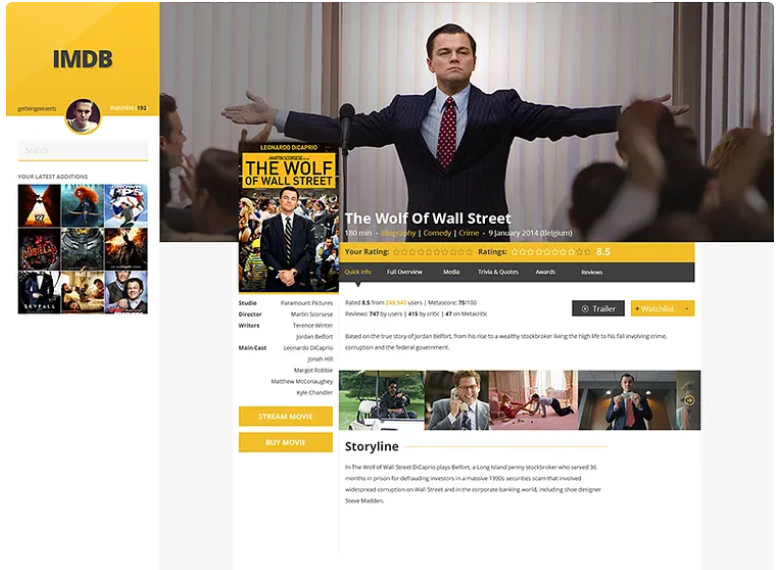

##OVERVIEW

The global film industry continues to generate massive volumes of content annually, making data-driven insights critical for production, distribution, and audience targeting. This dataset, derived from IMDb's title.basics file, provides key attributes of movies including genres, runtime, and release year. By analyzing these attributes, we aim to uncover trends in movie characteristics over time, identify dominant genres, and evaluate shifts in viewer preferences. This foundational knowledge is essential for decision-making in areas like content creation, marketing strategy, and investment focus in the entertainment industry.

##PROBLEM STATEMENT

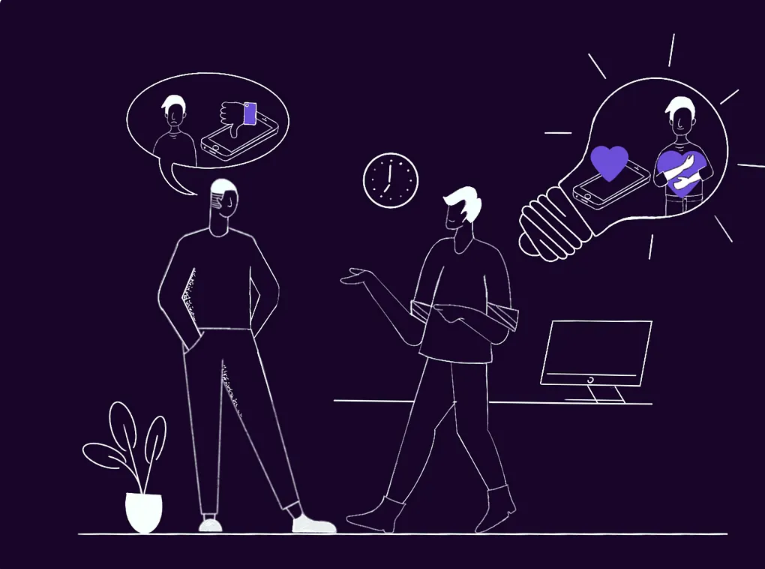

Just like any other industry the film industry has its on challenges. Film industry has emarged as groundbreaking industry that is used express feeling, inform, educate and entertain.
Film production companies, streaming platforms, and content marketers often face challenges in deciding:

1. What type of movies to invest in

2. How long a typical movie should be

3. Which genres are rising or falling in popularity

4. What genre combinations perform best by year

This project aims to answer:

*“What are the most popular movie genres over time, how do runtime patterns vary across genres, and how can this information help stakeholders align production with audience demand?”*

Solving this problem will help film-related businesses better allocate budgets, predict content success, and design catalogs that match viewer preferences by year and genre.



In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading file
df = pd.read_csv('title.basics.csv')

##Data Understanding

Before analyzing the data i need to get the full scope of the data. To achieve this i'll perform several actions using functions like:
- .head()
- .tail()
- .shape
- .info()
- .describe
- .columns
- .value_counts()

In [ ]:
#Checking the first five records of the dataset using the head() function
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
#Last five records using the tail() function
df.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [ ]:
#Checking the shape of the DataFrame using the shape function
df.shape

(146144, 6)

In [ ]:
#Getting summary of the DataFrame using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
#Getting description of numeric data in the DataFrame using describe() function
df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [ ]:
#Checking to see all columns using the columns function
df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [ ]:
#Getting the cumulative total of genres using value_counts() function
#Returns objects in descending order
df['genres'].value_counts()

,count
genres,
Documentary,32185
Drama,21486
Comedy,9177
Horror,4372
"Comedy,Drama",3519
...,...
"Adventure,Crime,Horror",1
"Fantasy,Musical,Mystery",1
"Adventure,History,War",1


In [ ]:
#Getting the cumulative total of start_year using value_counts() function
df['start_year'].value_counts()

,count
start_year,
2017,17504
2016,17272
2018,16849
2015,16243
2014,15589
2013,14709
2012,13787
2011,12900
2010,11849


##Data cleaning

The goal of this step is to ensure that the dataset is accurate, consistent, and ready for meaningful analysis. Since the IMDb dataset may contain missing, inconsistent, or extreme values, we apply several cleaning strategies to improve its quality.

We performed the following:
1. Dropping Columns
2. Missing value
3. Duplicate value
4. Unique value
5. Outlier detection
6. Feature engineering

In [ ]:
#Dropping columns that are not useful using the drop() function
df.drop(['tconst', 'original_title'],axis=1,inplace=True)
df.head()

,primary_title,start_year,runtime_minutes,genres
0,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,2018,122.0,Drama
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
#Checking for missing values
df.isnull().sum()

,0
primary_title,1
start_year,0
runtime_minutes,31739
genres,5408


In [ ]:
#Dropping records with missing values
df.dropna(subset=['primary_title', 'start_year', 'runtime_minutes', 'genres'], inplace=True)
df.isnull().sum()

,0
primary_title,0
start_year,0
runtime_minutes,0
genres,0


In [ ]:
df.shape

(112233, 4)

In [ ]:
#Checking for duplicated values
df.duplicated().sum()

np.int64(70)

In [ ]:
#Dealing with duplicate values by dropping records with duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(112163, 4)

In [ ]:
#Checking for unique values using nunique() function
df.nunique()

,0
primary_title,105479
start_year,13
runtime_minutes,361
genres,1040


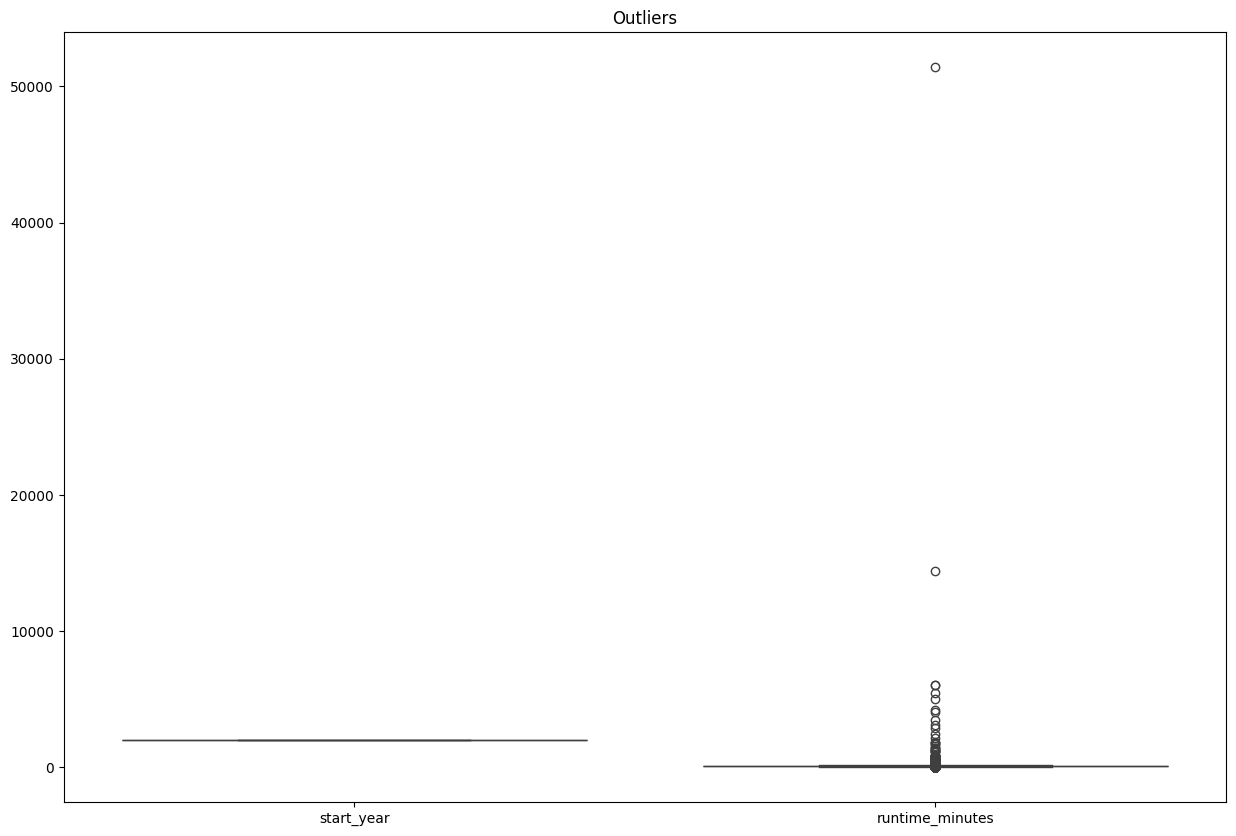

In [ ]:
#Outlier detection using boxplot
figsize = (15,10)
plt.figure(figsize=figsize)
sns.boxplot(data=df)
plt.title('Outliers')
plt.show()


In [ ]:
#Feature engineering
#Creating new column with already features to help with analysis
from datetime import datetime

current_year = datetime.now().year
df['movie_age'] = current_year - df['start_year']


In [ ]:
#Final clean dataset
df.head()

,primary_title,start_year,runtime_minutes,genres,movie_age
0,Sunghursh,2013,175.0,"Action,Crime,Drama",12
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",6
2,The Other Side of the Wind,2018,122.0,Drama,7
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",8
5,A Thin Life,2018,75.0,Comedy,7


In [ ]:
# Saving clean data to new dataset
df.to_csv('cleaned_movies_data.csv')

##EXPLORATORY DATA ANALYSIS

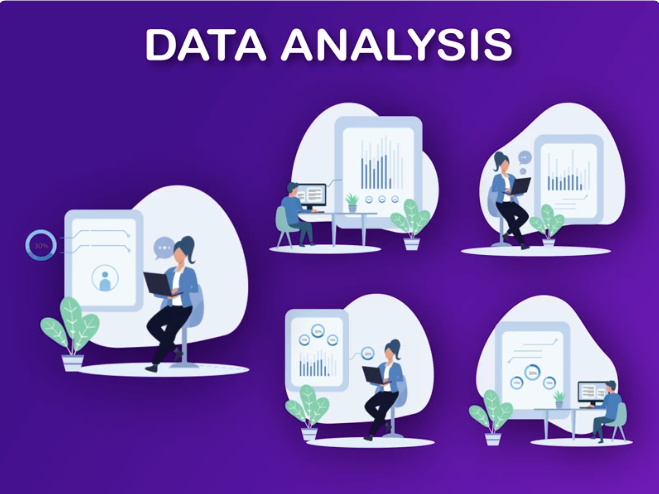

Once a clean dataset is acquaired we move to the analysis where data is broken down to find out trends, relationships and patterns ampong the variables. Thiswillfurther help us to find insights about the IMDB films data to help in visualizing.

In [ ]:
cd = pd.read_csv('cleaned_movies_data.csv')
cd.head()

,Unnamed: 0,primary_title,start_year,runtime_minutes,genres,movie_age
0,0,Sunghursh,2013,175.0,"Action,Crime,Drama",12
1,1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",6
2,2,The Other Side of the Wind,2018,122.0,Drama,7
3,4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",8
4,5,A Thin Life,2018,75.0,Comedy,7


##Univarient analysis

In this phase we will explored data but only variable at a time. We will use functions like:
1. Mean( )
2. Mode( )
3. Median( )
4. Standard deviation(std( ))
5. Variance( )
6. skew( )

In [ ]:
#Mean
cd['runtime_minutes'].mean()

np.float64(86.2669686081863)

In [ ]:
#Mode
cd[['start_year', 'genres']].mode()

,start_year,genres
0,2016,Documentary


In [ ]:
#Median
cd['runtime_minutes'].median()

87.0

In [ ]:
#Standard Deviation
cd['runtime_minutes'].std()

167.946600412079

In [ ]:
#Variance
cd['runtime_minutes'].var()

28206.060589974528

In [ ]:
#Skew
cd['runtime_minutes'].skew()

np.float64(261.95242944119116)

In [ ]:
#checking genre watched most in each year
cd.groupby('start_year')['genres'].value_counts()

start_year  genres               
2010        Documentary              2006
            Drama                    1470
            Comedy                    571
            Comedy,Drama              272
            Horror                    219
                                     ... 
2021        Biography,Drama             1
            Western                     1
2022        Action,Drama,Thriller       1
            Documentary                 1
            Drama                       1
Name: count, Length: 5394, dtype: int64

##BIVARIENT ANALYSIS

Bivarient analysis allows for exploration of two variables at a time. I'll use correlation.
1. correlation(corr( ))

In [ ]:
correlation = cd[['runtime_minutes', 'movie_age']].corr(method='pearson')
print("Correlation Matrix (Runtime vs Movie Age):")
print(correlation)

Correlation Matrix (Runtime vs Movie Age):
                 runtime_minutes  movie_age
runtime_minutes         1.000000  -0.001171
movie_age              -0.001171   1.000000


###Graphs

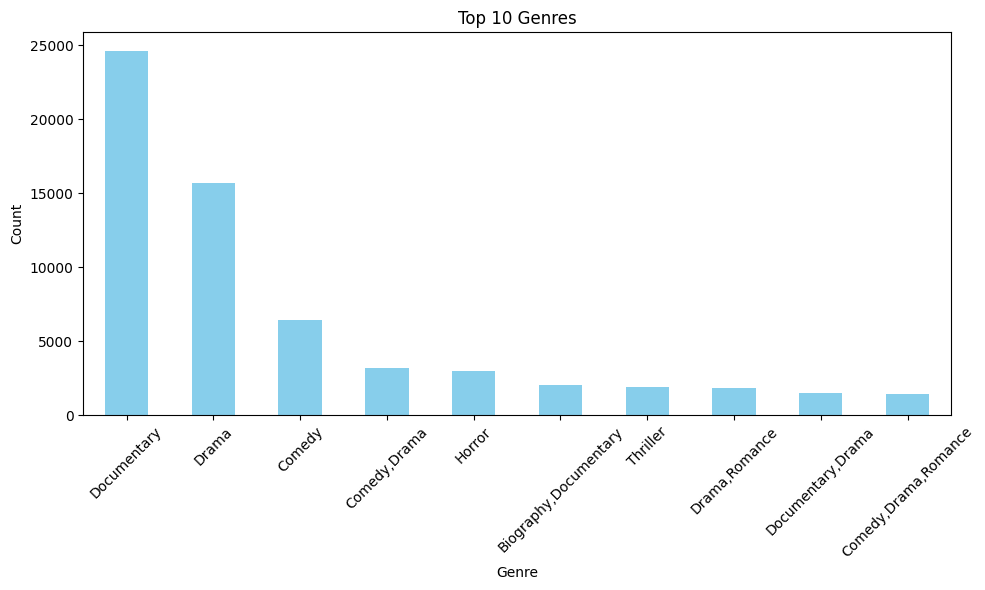

In [ ]:
#Top ten genres
plt.figure(figsize=(10, 6))
cd['genres'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Observations

According to the bar chat above:
- The most produced films are documentaries with close to 25, 000 films followed by drama films which are slightly above 15, 000 films in total.
-The least produced films are comedy,drama,romance films which have less that 5000 films.
-The margin between the most produced and list produced films is high with more than 75% of least produced films being below 5000 films.

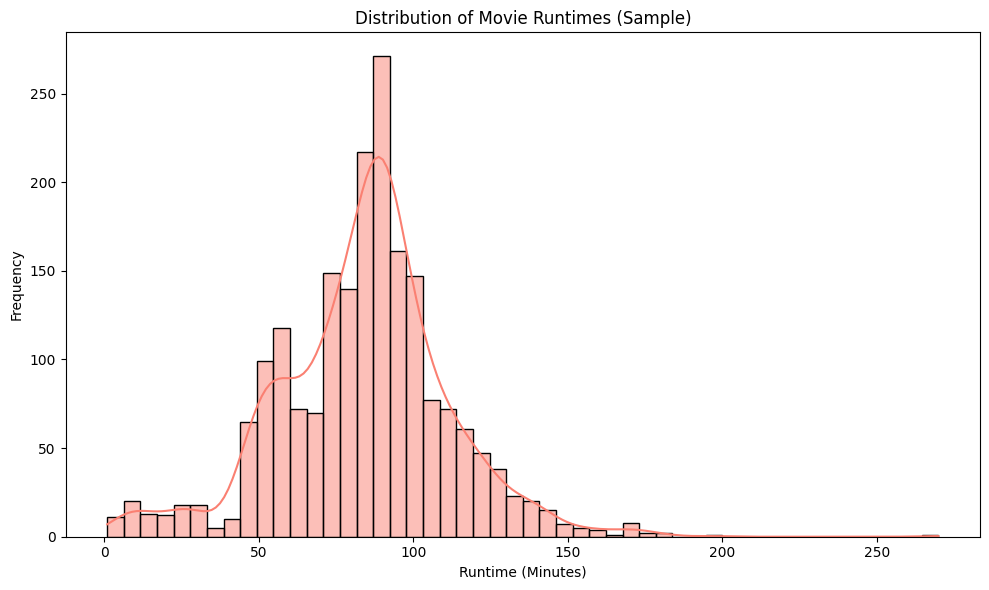

In [ ]:
#Runtime Distribution (using sample)
sample_cd = cd.sample(n=2000, random_state=42)

plt.figure(figsize=(10, 6))
sns.histplot(sample_cd['runtime_minutes'], bins=50, kde=True, color='salmon')
plt.title("Distribution of Movie Runtimes (Sample)")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


According to the histogram above:

- Most films have there runtime between 90 minutes and 100 minutes.
- The least runtime of films is above 150 minutes and slightly higher between 0 and 50 minutes.

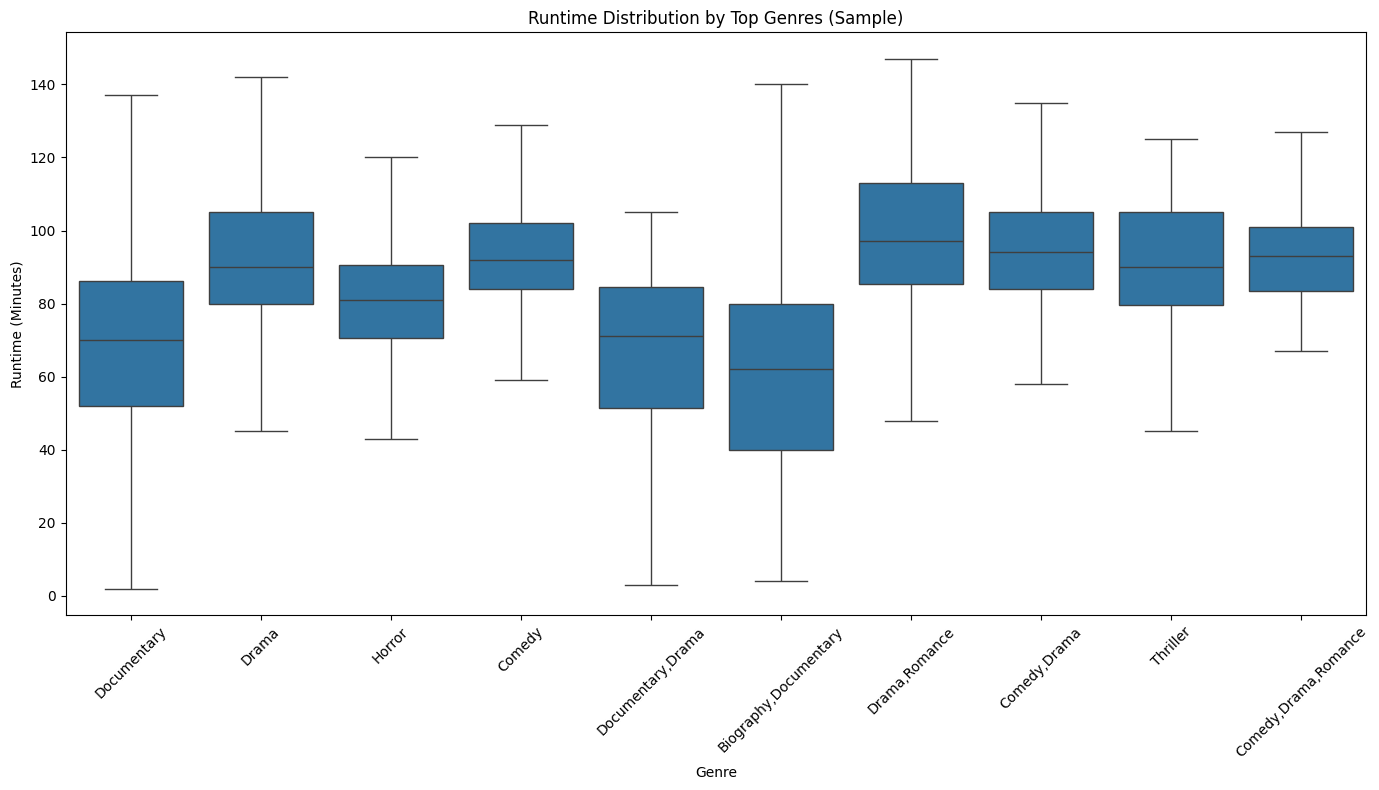

In [ ]:
#Runtime by Genre (Boxplot for Top 10 Genres + Sample)
top_genres = cd['genres'].value_counts().head(10).index
sample_cd = cd[cd['genres'].isin(top_genres)].sample(n=2000, random_state=42)

plt.figure(figsize=(14, 8))
sns.boxplot(data=sample_cd, x='genres', y='runtime_minutes', showfliers = False)
plt.title("Runtime Distribution by Top Genres (Sample)")
plt.xlabel("Genre")
plt.ylabel("Runtime (Minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


According to the boxplots above:
- The film with the most runtime is biograpghy,documentary followed by documentary.
- The film with the least runtime is comedy,drama,romance

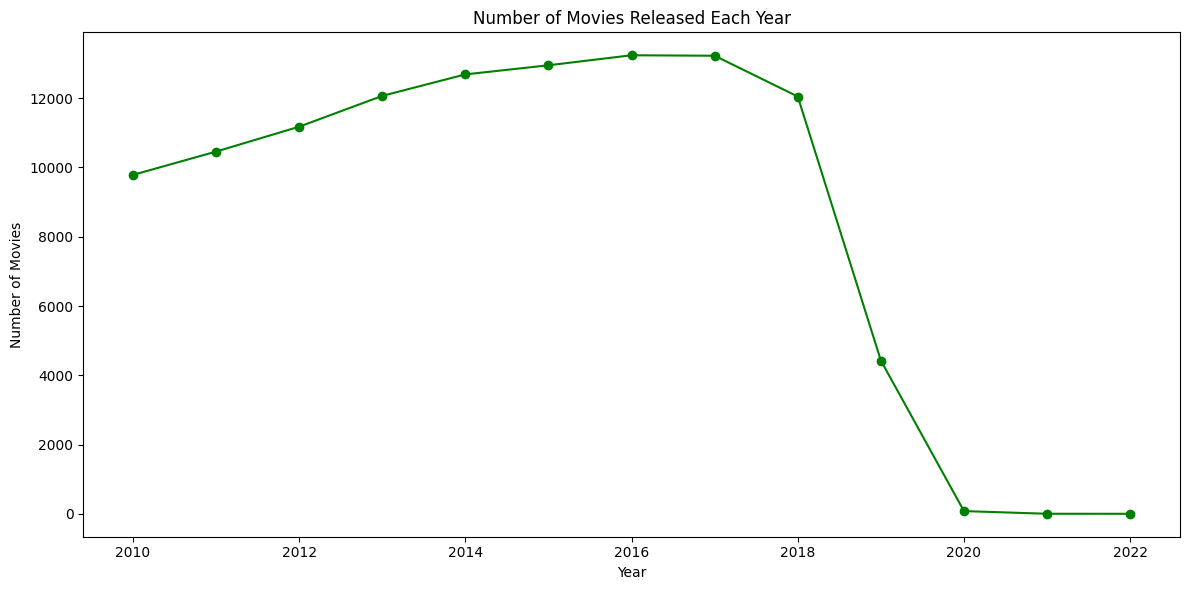

In [ ]:
#Movie Release Trend Over Years
plt.figure(figsize=(12, 6))
cd['start_year'].value_counts().sort_index().plot(marker='o', color='green')
plt.title("Number of Movies Released Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()


According to the linegraph above:
- There was a staedy rise of film production in 2010 which was slightly below 10, 000 to 2018 which was above 12, 000 films.
- The productive film production years were between 2016 and 2018 where the film production was above 12, 000 films.
- There was a drastic drop in film production between 2019 and 2021 where production dropped from above 12, 000 to below 2,000 films.

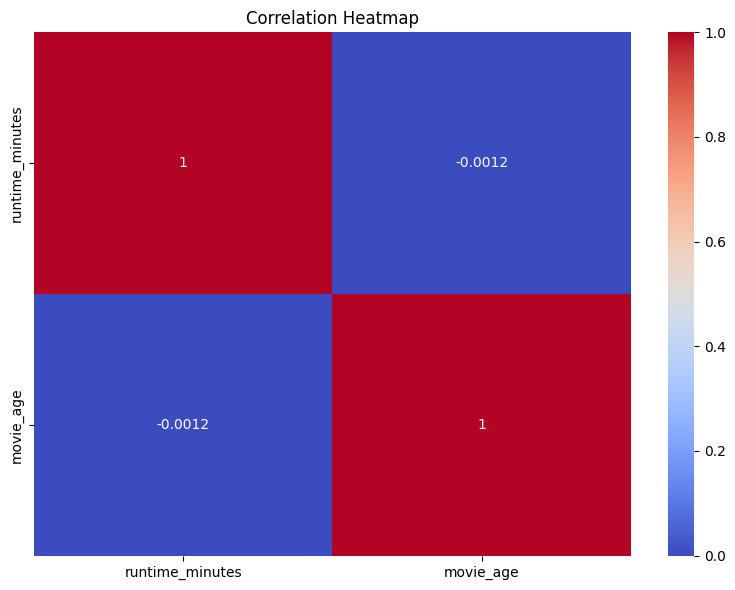

In [ ]:
#Correlation Heatmap (runtime + age)
plt.figure(figsize=(8, 6))
sns.heatmap(cd[['runtime_minutes', 'movie_age']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

According to the heatmap above:
- There is negative correlation between movie runtime and movie age. That mean the change in one does not affect the other.

In [ ]:
cd.head()

,Unnamed: 0,primary_title,start_year,runtime_minutes,genres,movie_age
0,0,Sunghursh,2013,175.0,"Action,Crime,Drama",12
1,1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",6
2,2,The Other Side of the Wind,2018,122.0,Drama,7
3,4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",8
4,5,A Thin Life,2018,75.0,Comedy,7


In [ ]:
cd['start_year'].value_counts()

,count
start_year,
2016,13240
2017,13226
2015,12951
2014,12688
2013,12068
2018,12049
2012,11178
2011,10460
2010,9787


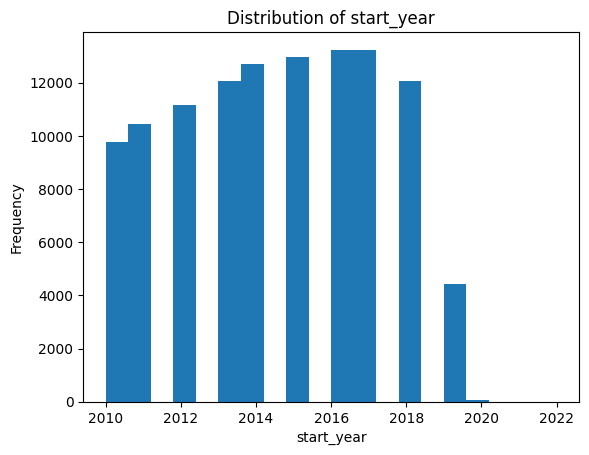

In [ ]:
from matplotlib import pyplot as plt
cd['start_year'].plot(kind='hist', bins=20)
plt.xlabel('start_year')
plt.ylabel('Frequency')
plt.title('Distribution of start_year')
plt.show()

According to the histogram above:
- 2016 Recorded the highest film production numbers with close to 12,000 and a half.

In [ ]:
#Top genres in each year
cd.groupby('start_year')['genres'].value_counts()

start_year  genres               
2010        Documentary              2006
            Drama                    1470
            Comedy                    571
            Comedy,Drama              272
            Horror                    219
                                     ... 
2021        Biography,Drama             1
            Western                     1
2022        Action,Drama,Thriller       1
            Documentary                 1
            Drama                       1
Name: count, Length: 5394, dtype: int64

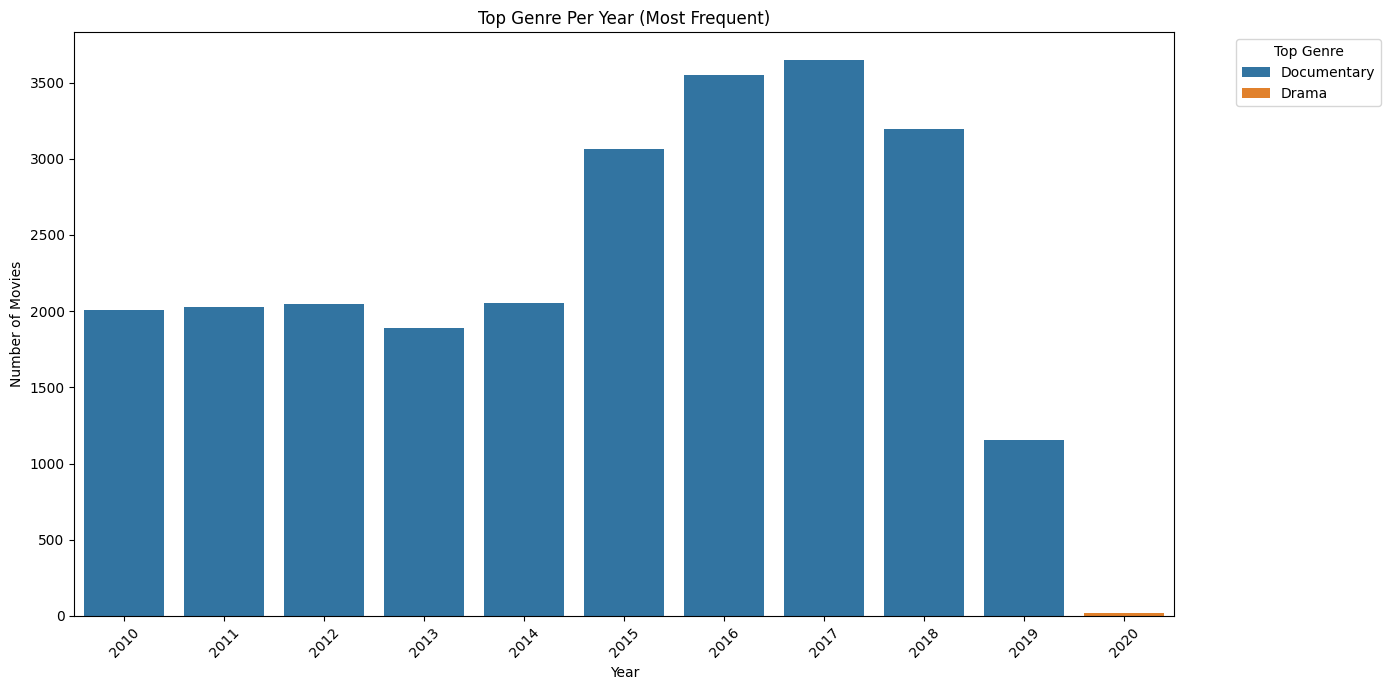

In [ ]:
# Filtered out years with very few entries
yearly_counts = df['start_year'].value_counts()
valid_years = yearly_counts[yearly_counts > 20].index
filtered_df = df[df['start_year'].isin(valid_years)]

# Got top genre per year
top_genres_by_year = (
    filtered_df.groupby(['start_year', 'genres'])
    .size()
    .reset_index(name='count')
    .sort_values(['start_year', 'count'], ascending=[True, False])
)

# Keep only the top genre per year
top_genres_per_year = top_genres_by_year.groupby('start_year').first().reset_index()

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=top_genres_per_year, x='start_year', y='count', hue='genres', dodge=False)
plt.title("Top Genre Per Year (Most Frequent)")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.legend(title='Top Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


From the bar plot above:
- Documentaries have been the highest produced films from 2010 through to 2019.
- The best documentary production year was 2017 with more 3500 films produced.
- In 2020 drama was the most produced films bust still had less than 500 produce.

/tmp/ipython-input-1783773623.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='genres', y='runtime_minutes', palette='Set2', showfliers = False)


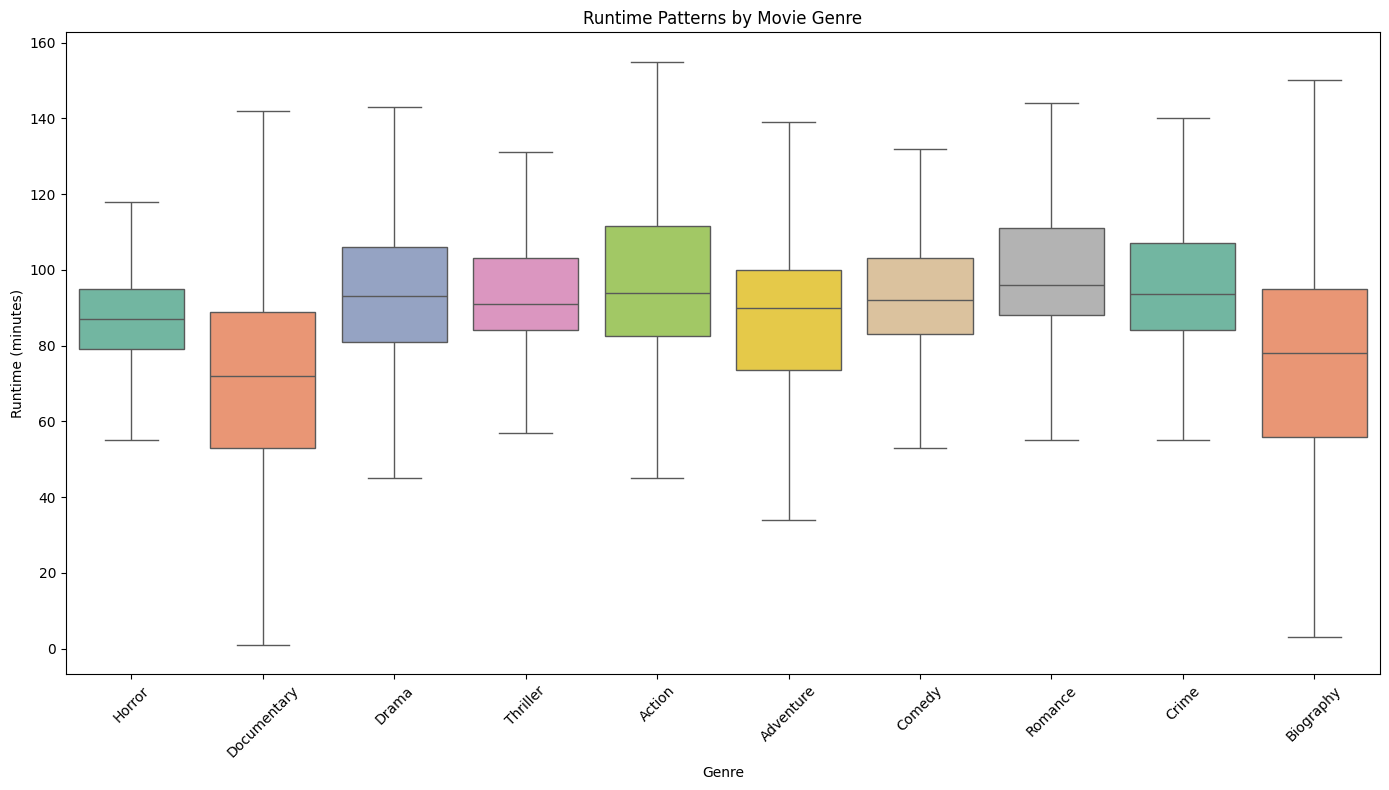

In [ ]:
# Take 5000 random movies to make the plot clean
sample_df = df.dropna(subset=['runtime_minutes', 'genres']).sample(n=5000, random_state=42)

# If genres column has multiple values (e.g. "Action,Drama"), split & explode
sample_df['genres'] = sample_df['genres'].str.split(',')
sample_df = sample_df.explode('genres')

# Filter to common genres only (top 10)
top_genres = sample_df['genres'].value_counts().nlargest(10).index
filtered_df = sample_df[sample_df['genres'].isin(top_genres)]

# Plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='genres', y='runtime_minutes', palette='Set2', showfliers = False)
plt.title("Runtime Patterns by Movie Genre")
plt.xlabel("Genre")
plt.ylabel("Runtime (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

According to the graph above:
- The specific genre produced with highest runtime was documentary and biograpghy.
- The specific genre produced with least running time is horror followed by thriller.

##CONCLUSION

Analysis of data set allowed for formulating of very meaningful insights.
1. The most produced films are documentaries because they are educative and are used to drive motions and awareness like wars, femines and environmental problems.
2. The most produced entertainment film is drama because it draws in a very large audience and generated a lot of revenues for producers and investors.
3. 2016 was the highest film production year due to high demand of grossing films and emergent of festivals and rising in popularity of fil producers like marvel and hollywood.
4. The least film production year was 2019 due to drastic drop in production that was caused by the covid-19 pandemic that cause crashing in market an actors not able to meet due to the restrictions.
5. popularity of drama films rised in 2020 due to demand of entertainment from audience while in lockdown.
6. Documentary and Biographies record the highest runningtime out of akk the films because of the load of information the carry and try to bring out to the audience.

##RECOMMENDATIONS

1. Historical trends show that Drama, Comedy, and Documentary dominate production volume. Studios and content platforms should prioritize these genres when planning new titles, especially in years with high audience engagement.
2. Dramas and Action films perform better with runtimes between 90–120 minutes.
Tailoring runtimes to genre norms can improve viewer satisfaction and retention.
3. Certain genres peak in specific time periods. For example, Comedy saw a spike post-2010.Producers can align releases with resurging genre popularity to ride the wave of audience interest.
4. There’s a negative correlation between movie age and runtime, indicating that older movies tend to be longer.This means modern audience prefer shorter film. Producers should prioritise creating shorter films.
